In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt

# import seaborn as sns
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import plotly.figure_factory as ff

%load_ext lab_black

In [2]:
df_2019 = pd.read_csv("../data/2019data.csv", low_memory=False)
df_2019.head(1)

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end


In [3]:
df_2020 = pd.read_csv("../data/2020data.csv", low_memory=False)
df_2020.head(1)

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,modified_date,month,hour,day_of_week,council_district_start,council_district_end,year,census_geoid_start,census_geoid_end


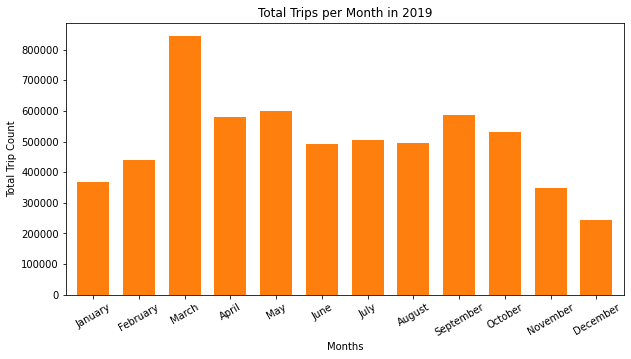

In [10]:
monthly_total = pd.DataFrame(df_2019["month"].value_counts()).sort_index()
import calendar

mn = [calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(
    title="Total Trips per Month in 2019",
    width=0.7,
    figsize=(10, 5),
    rot=30,
    legend=False,
    color="tab:orange",
)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.show()

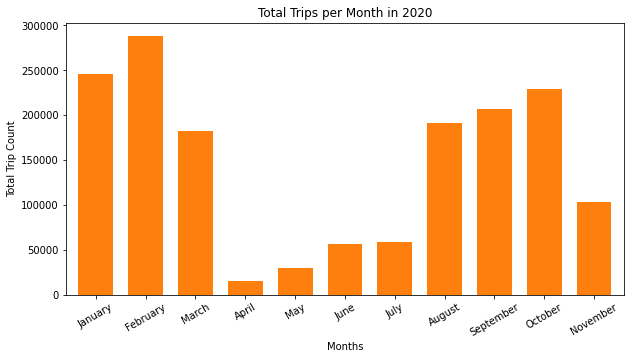

In [11]:
monthly_total = pd.DataFrame(df_2020["month"].value_counts()).sort_index()
import calendar

mn = [calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(
    title="Total Trips per Month in 2020",
    width=0.7,
    figsize=(10, 5),
    rot=30,
    legend=False,
    color="tab:orange",
)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.show()

In [ ]:
# Create a plot using geopandas and choropleth of census tract starts
_, ax = plt.subplots(figsize=(18, 18))

# Match the datatypes
map_df["CTIDFP00"] = map_df["CTIDFP00"].astype("int64")
map_df[["INTPTLAT00", "INTPTLON00"]] = map_df[["INTPTLAT00", "INTPTLON00"]].astype(
    "float64"
)

# Merge the geodataframe with the census starts dataframe
starts_plot = map_df.set_index("CTIDFP00").join(census_trip_start, how="inner")

vmax_start = 600000
vmin_start = 0
# Render the glyphs:
map_df.plot(ax=ax, color="grey", edgecolor="blue", alpha=0.2)
starts_plot.plot(
    ax=ax,
    column="Census GEOID Start",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
    vmax=vmax_start,
    vmin=vmin_start,
)
streets.plot(ax=ax, color="turquoise", alpha=0.2)

# Label census tracts
for idx, row in map_df.iterrows():
    plt.annotate(
        s=row["TRACTCE00"],
        xy=(row["INTPTLON00"], row["INTPTLAT00"]),
        horizontalalignment="center",
        clip_on=True,
    )

# Set the limits of the plot
# To get a zommed out view use: (-97.919881, -97.589348, 30.139918,30.426626)
# For zoomed map use : (-97.81, -97.68, 30.22, 30.325)
bbox = (-97.919881, -97.589348, 30.139918, 30.426626)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])


plt.axis("off")
plt.title("Popular Census Tracts to START a ride", fontsize=20)
sm_start = plt.cm.ScalarMappable(
    cmap="YlGn", norm=plt.Normalize(vmin=vmin_start, vmax=vmax_start)
)

plt.colorbar(sm_start, fraction=0.015, aspect=50)
plt.savefig("Plots/choropeth_tractstart.png")
plt.show()